# IDENTIFY POTENTIAL CUSTOMERS FOR LOAN

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error

In [70]:
df=pd.read_csv('Bank_Personal_Loan_Modelling.csv')

In [4]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [6]:
df.shape

(5000, 14)

# EDA

In [8]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# OBSERVATION

In [9]:
# min experience shows negativevalue. In actual its not possible

In [10]:
# use booleanfilter

In [11]:
df[df['Experience']<0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


In [12]:
len(df[df['Experience']<0])

52

In [13]:
# change negative value into zero

In [14]:
df1=df[(df['Experience']<0)==0]

In [15]:
df1.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000,4948.000000
mean,2501.268795,45.557195,20.331043,73.814470,93151.573363,2.391471,1.935926,1.878941,56.634398,0.097009,0.104285,0.061035,0.597009,0.294058
std,1443.277676,11.320735,11.311973,46.112596,2126.669017,1.148444,1.747694,0.839745,101.828885,0.296000,0.305660,0.239418,0.490549,0.455664
min,1.000000,24.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1254.750000,36.000000,10.750000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2497.500000,46.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.600000,3.000000,101.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# no misssing values

In [73]:
df.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# visualize the data

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Personal Loan'>

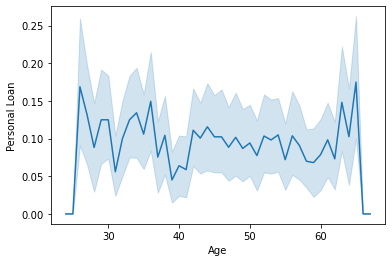

In [18]:
sns.lineplot(df1['Age'],df1['Personal Loan'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

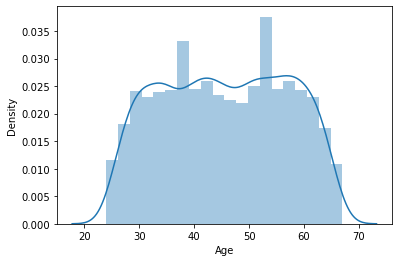

In [19]:
sns.distplot(df1['Age'])

In [20]:
# Observation

In [21]:
# we can say most of the customer are between30 to 60 years range

<AxesSubplot:xlabel='Education', ylabel='Income'>

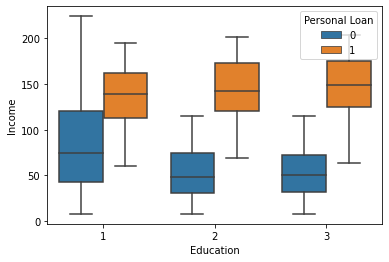

In [22]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df1)

In [23]:
# preferance of all three level people for personal loan is same

<AxesSubplot:xlabel='Education', ylabel='Mortgage'>

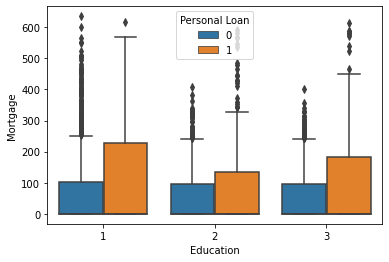

In [24]:
sns.boxplot(x='Education',y='Mortgage',hue='Personal Loan',data=df1)

In [25]:
# customer who taken loan have more mortgage

<AxesSubplot:xlabel='Family', ylabel='count'>

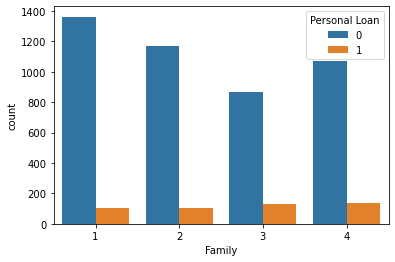

In [26]:
sns.countplot(x='Family',data=df1,hue='Personal Loan',orient='v')

In [27]:
# no influence of family memeber on personal loan

<AxesSubplot:xlabel='Securities Account', ylabel='count'>

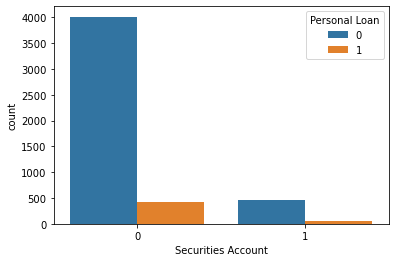

In [28]:
sns.countplot(x='Securities Account',data=df1,hue='Personal Loan',orient='v')

In [29]:
# majority of vustomer who does not have the security account are prefer for loan

<AxesSubplot:xlabel='CD Account', ylabel='count'>

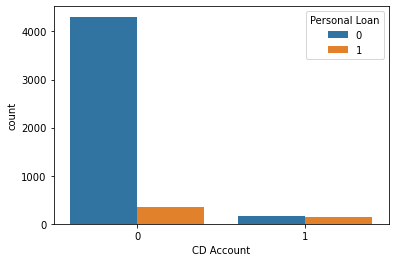

In [30]:
sns.countplot(x='CD Account',data=df1,hue='Personal Loan',orient='v')

In [31]:
# almost all the customer who  have personal loan have CD account

In [32]:
cm=df1.corr()

In [33]:
cm

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.009794,-0.009406,-0.017255,0.013516,-0.016382,-0.025607,0.021902,-0.011172,-0.025124,-0.018961,-0.007085,-0.001508,0.017294
Age,-0.009794,1.000000,0.994101,-0.058006,-0.029325,-0.039279,-0.050879,0.046222,-0.015184,-0.014204,0.000496,0.003261,0.013542,0.007496
Experience,-0.009406,0.994101,1.000000,-0.049245,-0.028564,-0.045610,-0.048939,0.018243,-0.013459,-0.014121,-0.000457,0.005450,0.013518,0.008876
Income,-0.017255,-0.058006,-0.049245,1.000000,-0.014958,-0.155666,0.646178,-0.187992,0.206921,0.504228,-0.002327,0.170171,0.014433,-0.004493
ZIP Code,0.013516,-0.029325,-0.028564,-0.014958,1.000000,0.011109,-0.002703,-0.017391,0.008264,0.000251,0.003555,0.020149,0.019155,0.007355
Family,-0.016382,-0.039279,-0.045610,-0.155666,0.011109,1.000000,-0.107230,0.064032,-0.020419,0.063088,0.020155,0.015274,0.008466,0.012905
CCAvg,-0.025607,-0.050879,-0.048939,0.646178,-0.002703,-0.107230,1.000000,-0.133939,0.109905,0.369388,0.012477,0.137587,-0.003476,-0.007377
Education,0.021902,0.046222,0.018243,-0.187992,-0.017391,0.064032,-0.133939,1.000000,-0.032559,0.138339,-0.007508,0.014639,-0.013932,-0.012604
Mortgage,-0.011172,-0.015184,-0.013459,0.206921,0.008264,-0.020419,0.109905,-0.032559,1.000000,0.142322,-0.003717,0.089369,-0.006754,-0.006910
Personal Loan,-0.025124,-0.014204,-0.014121,0.504228,0.000251,0.063088,0.369388,0.138339,0.142322,1.000000,0.022216,0.315769,0.006175,0.002776


In [34]:
# observation
# there is strong positive correlation between age and experience
# Also high correlation between CCAvg and income
# also high correlation between personal loan and income

In [35]:
df1.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [36]:
# create X and Y

In [37]:
X=df1.drop(['ID','Personal Loan','ZIP Code'],axis=1)
y=df1['Personal Loan']

In [38]:
X.shape

(4948, 11)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

# Decision Tree

In [40]:
dt_model=DecisionTreeClassifier(criterion='entropy')
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [41]:
dt_model.score(X_test,y_test)

0.9845117845117846

In [42]:
y_pred=dt_model.predict(X_test)

# Random Forest

In [43]:
classifier=RandomForestClassifier(n_estimators=100,criterion='gini')
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [44]:
classifier.score(X_test,y_test)

0.98989898989899

# Logistic Regression

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
sc=StandardScaler()
sc.fit(X_train)

StandardScaler()

In [47]:
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [50]:
lr.score(X_test,y_test)

0.9515151515151515

# Pipeline

In [51]:
from sklearn.pipeline import Pipeline

In [52]:
pipe=Pipeline([('sc',StandardScaler()),('lr',LogisticRegression())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()), ('lr', LogisticRegression())])

In [53]:
pipe.score(X_test,y_test)

0.9515151515151515

# KNN

In [54]:
classifier1=KNeighborsClassifier(n_neighbors=24)
classifier1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=24)

In [55]:
classifier1.score(X_test,y_test)

0.9393939393939394

# Naive Bays

In [56]:
naive_model=GaussianNB()
naive_model.fit(X_train,y_train)

GaussianNB()

In [57]:
naive_model.score(X_test,y_test)

0.8727272727272727

# Conclusion = Random Forest is best model

In [58]:
# save your model

In [75]:
import pickle
with open ('clf_loan','wb') as f:
    pickle.dump(classifier,f)